In [ ]:
#Importing all necessary modules
import sklearn
import numpy as np
import pandas as pd
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/A 2023/CustomerChurn_dataset.csv')

#First understanding the data through carrying out various EDA analysis

In [ ]:
data.head()
second_data =data.copy(deep=True)

In [ ]:
#Calculating the total number of missing values in the dataframe
missing_values=data.isnull().sum().sum()
print("The number of missing values in the dataframe is",missing_values)

The number of missing values in the dataframe is 0


In [ ]:
#Checking number of classes of the target variable
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#Understanding the statistical description of the data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#viewing the data types of the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

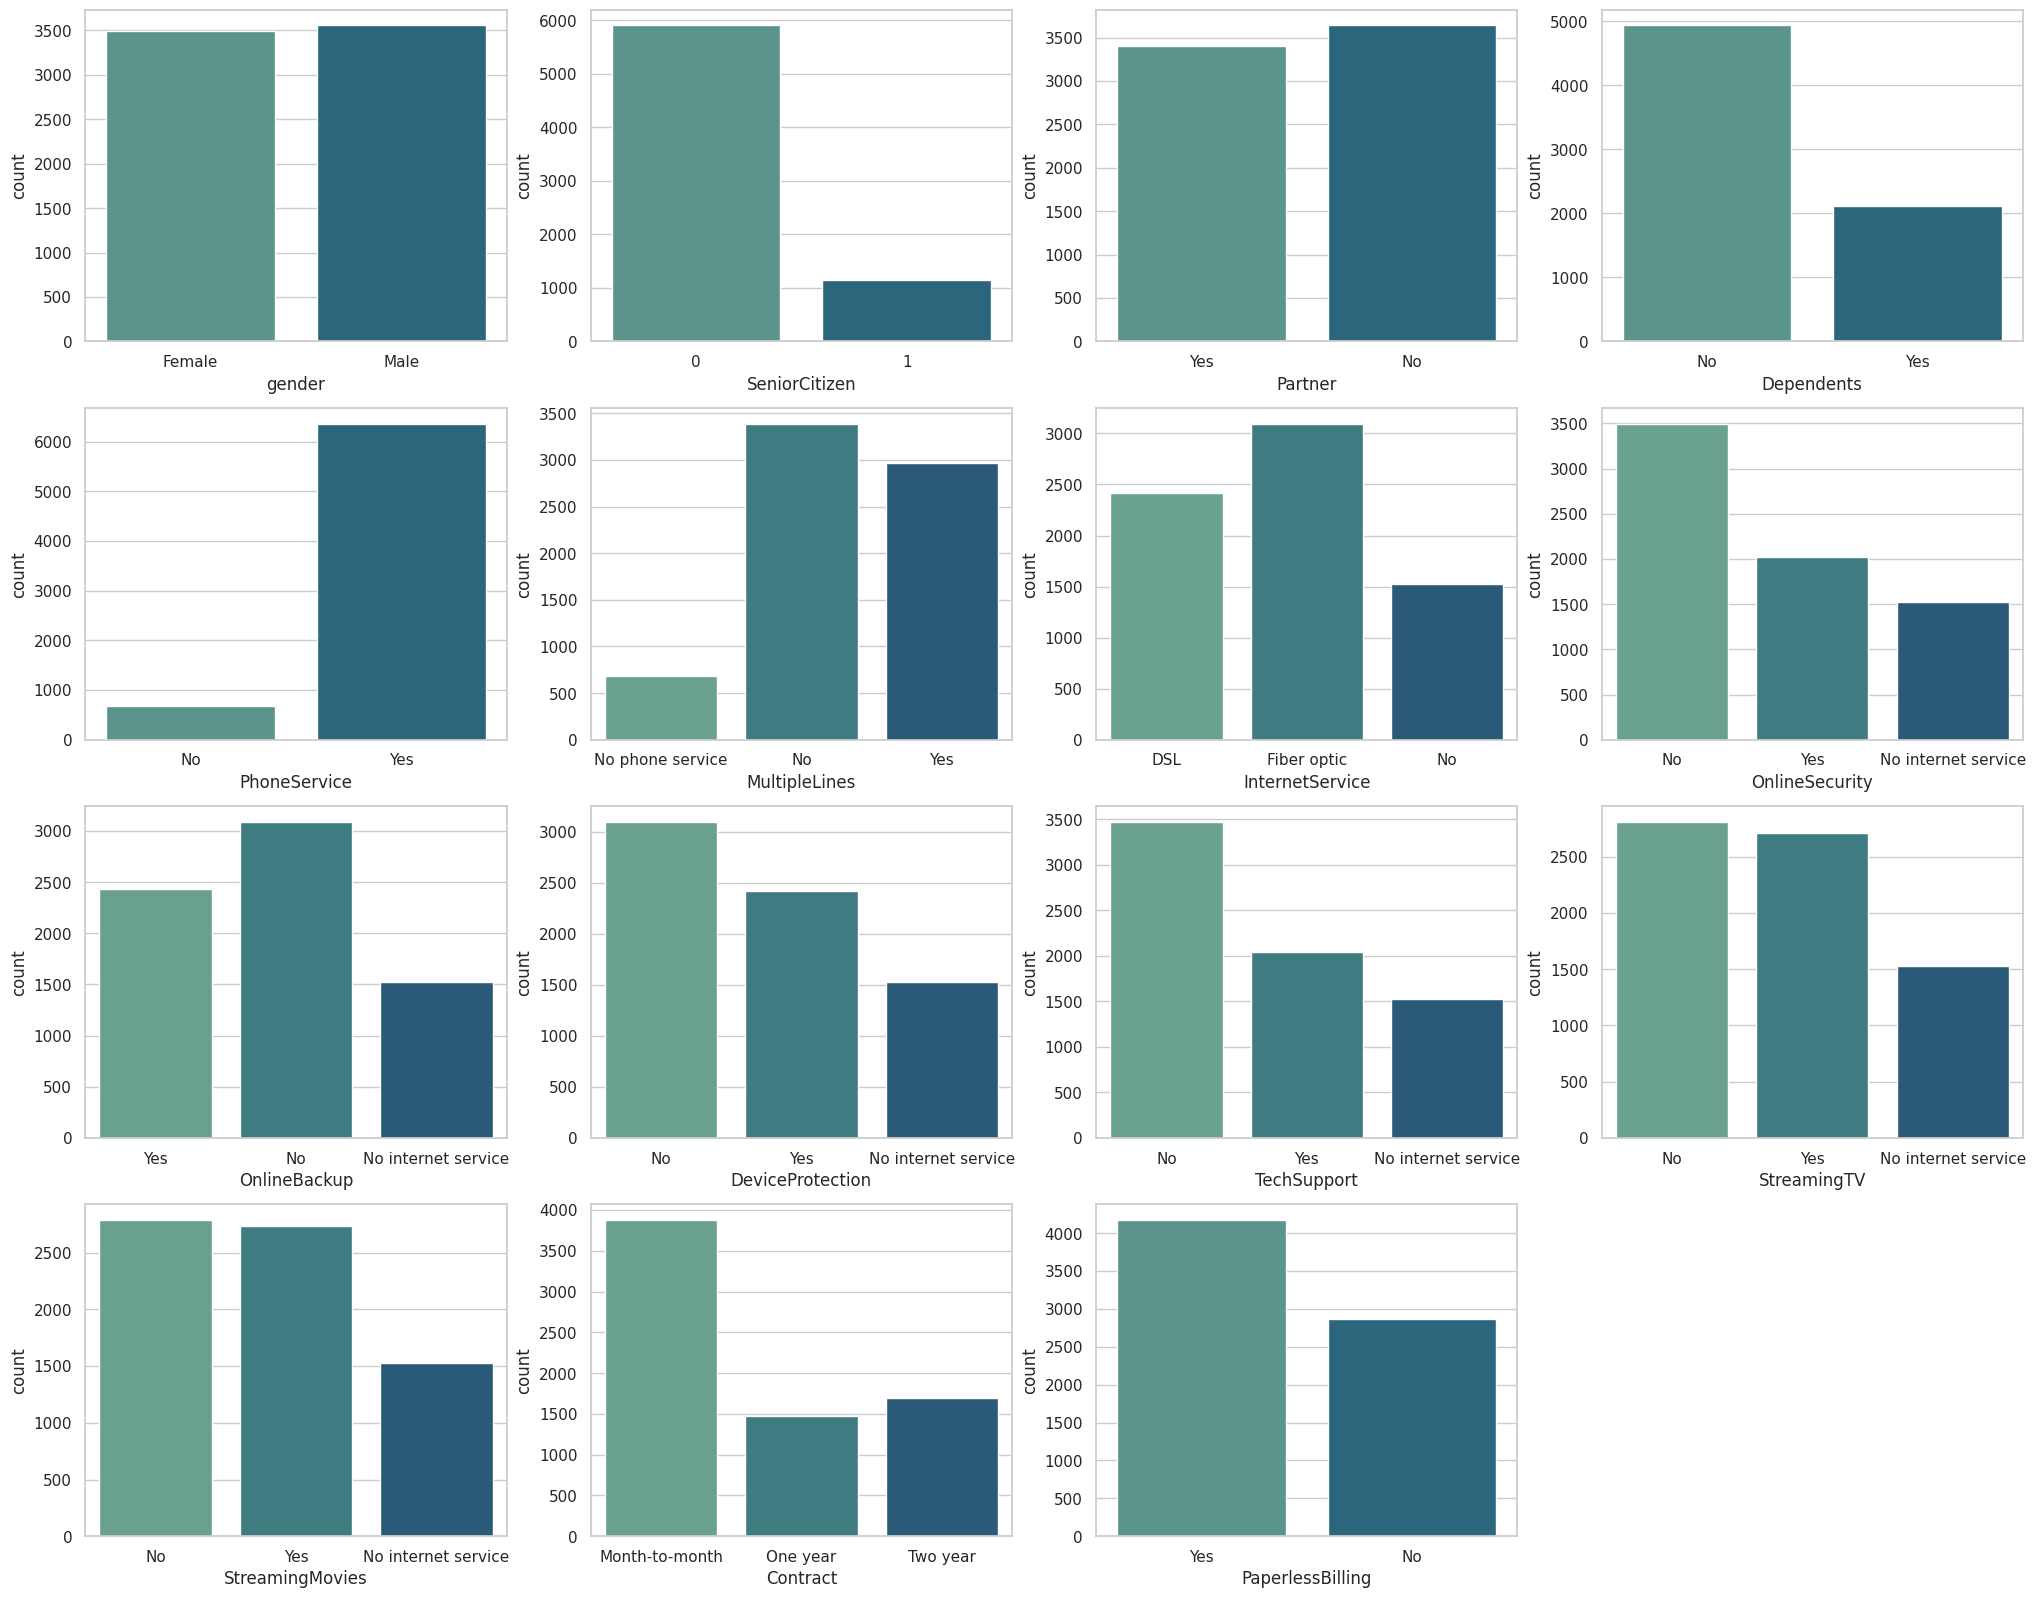

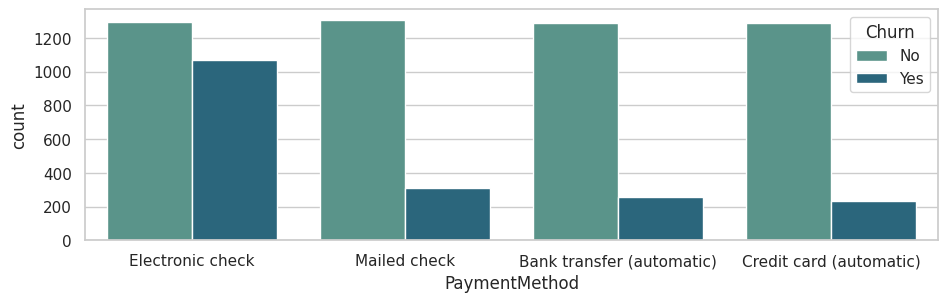

<Figure size 640x480 with 0 Axes>

In [ ]:
cat_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
              'Contract', 'PaperlessBilling']

plt.figure(figsize=(25, 25))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(5, 4, n + 1)
    g=sns.countplot(data=data, x=data[variable], ax=ax, palette='crest')
plt.show()
plt.figure(figsize=(11,3))
_ = sns.countplot(x= 'PaymentMethod', hue='Churn', data=data, palette='crest')
plt.show()
plt.tight_layout()

In [ ]:
#Viewing the distribution of the target variable
target = data["Churn"].value_counts().to_frame()
target = target.reset_index()
target = target.rename(columns={'index': 'Category'})
fig = px.pie(target, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

From the above distribution of the target variable we see that the data is unbalanced as the percentage of customers who do not churn is higher (73.5) compared to the ones who churn (26.5)

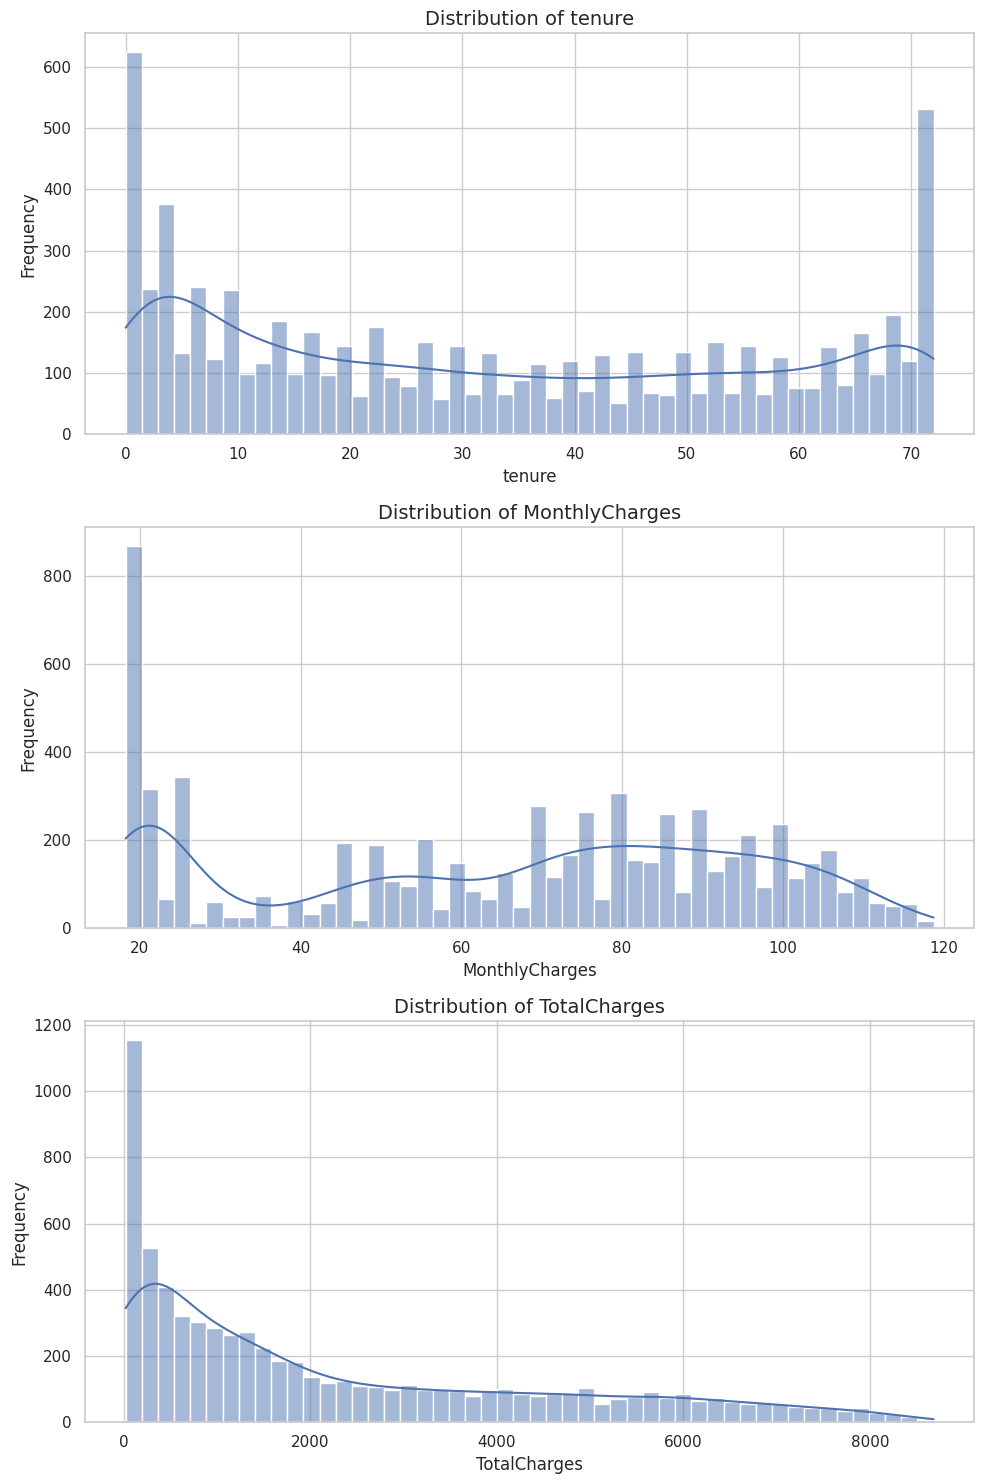

In [ ]:
#Distribution of the numerical variables in the data
columns_to_visualize = ['tenure','MonthlyCharges','TotalCharges']

#Converting the TotalCharges to numeriic for visualization
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'].replace(' ', 'NaN'), errors='coerce')

sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=len(columns_to_visualize), figsize=(10, 15))

for i, col in enumerate(columns_to_visualize):
    sns.histplot(data[col], ax=axes[i], kde=True, bins=50)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()


#Carrying out Data Preprocessing

According to kaggle,CustomerId contains random values and has no effect on customer leaving the bank.Hence, I am removing it from the dataset as it is a **useless variable**

In [ ]:
#Removing customerID attribute (which would be useless in this problem)
data.drop('customerID', inplace=True, axis=1,)

From my observation of the gender variable, the number of females and males of those who churn and do not churn are fairly equal; Therefore I will conduct an investigation of the relationship between churn and gender

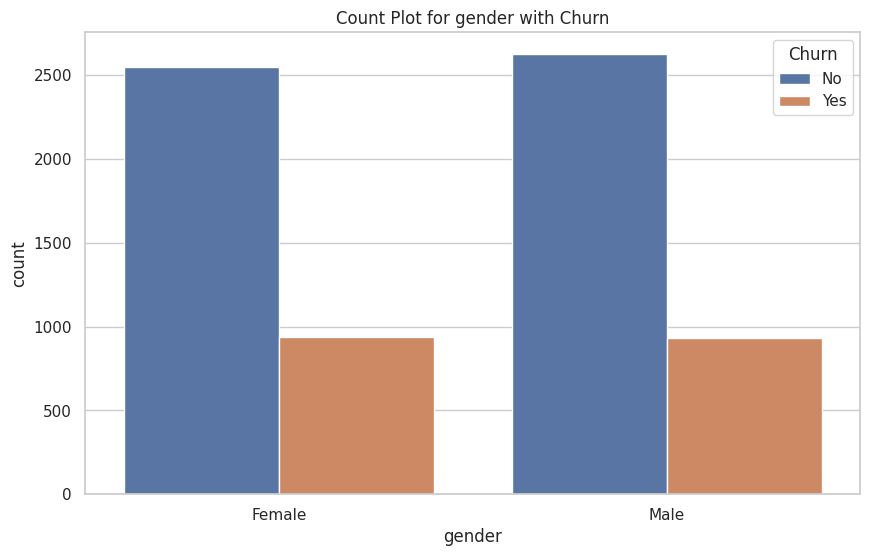

In [ ]:
#Creating the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=data, x='gender', hue='Churn')
plt.title(f'Count Plot for gender with Churn')
plt.show()

**Results**: There is not much difference gender wise in churn rate as we can see in above plot. Both gender have nearly equal churn rate. Therefore, the gender of a person has significant influence in whether they churn or not

In [ ]:
#Removing gender attribute
data.drop('gender', inplace=True, axis=1,)

In [ ]:
# Encoding the categorical variables
'''binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling','Churn']
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])'''
le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
  data[column] =le.fit_transform(data[column])


In [ ]:
#Calculating the number of missing values in TotalCharges since I had changed it to numeric form
data['TotalCharges'].isnull().sum()

11

In [ ]:
# Imputing the TotalCharges column since it now has missing values
knn_imputer = KNNImputer(n_neighbors=2)
data['TotalCharges'] = knn_imputer.fit_transform(data[['TotalCharges']])

In [ ]:
#Calculating the number of missing values in TotalCharges now
data['TotalCharges'].isnull().sum()

0

In [ ]:
'''#Using One-Hot encoding for the other categorical variables
categorical_var = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                   'OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','DeviceProtection']
data  = pd.get_dummies(data, columns=categorical_var)'''

"#Using One-Hot encoding for the other categorical variables\ncategorical_var = ['MultipleLines','InternetService','OnlineSecurity','OnlineBackup',\n                   'OnlineBackup','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod','DeviceProtection']\ndata  = pd.get_dummies(data, columns=categorical_var)"

In [ ]:
# Separating features and target variable
y = data['Churn']
x = data.drop('Churn', axis=1)


#1. Extracting the relevant features that can define a customer churn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(x, y)

# Extract feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=x.columns)

In [ ]:
# Sort features by importance in descending order
sorted_features = feature_importances.sort_values(ascending=False)
sorted_features

TotalCharges        0.201817
MonthlyCharges      0.188244
tenure              0.160504
Contract            0.077098
PaymentMethod       0.052319
OnlineSecurity      0.050517
TechSupport         0.040238
OnlineBackup        0.028372
PaperlessBilling    0.025164
Partner             0.024289
InternetService     0.024072
DeviceProtection    0.023531
MultipleLines       0.023190
SeniorCitizen       0.020536
Dependents          0.020286
StreamingTV         0.017877
StreamingMovies     0.016900
PhoneService        0.005044
dtype: float64

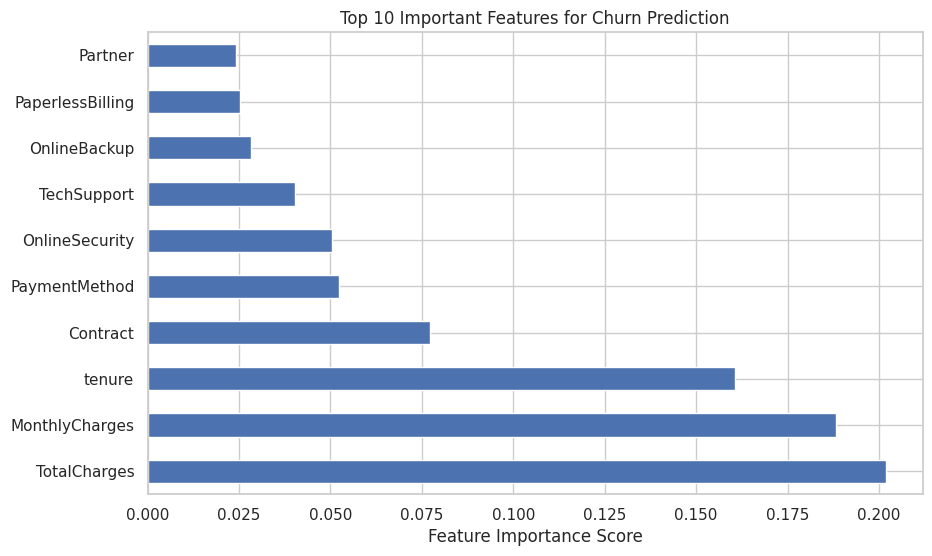

In [ ]:
# Plot the top N features
top_n = 10
plt.figure(figsize=(10, 6))
sorted_features[:top_n].plot(kind='barh')
plt.title('Top {} Important Features for Churn Prediction'.format(top_n))
plt.xlabel('Feature Importance Score')
plt.show()

In [ ]:
# Extract relevant features based on importance
threshold_importance = 0.024# Setting the threshold
relevant_features = sorted_features[sorted_features >= threshold_importance].index

final_features = x[relevant_features]
final_features

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,OnlineBackup,PaperlessBilling,Partner,InternetService
0,29.85,29.85,1,0,2,0,0,2,1,1,0
1,1889.50,56.95,34,1,3,2,0,0,0,0,0
2,108.15,53.85,2,0,3,2,0,2,1,0,0
3,1840.75,42.30,45,1,0,2,2,0,0,0,0
4,151.65,70.70,2,0,2,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1990.50,84.80,24,1,3,2,2,0,1,1,0
7039,7362.90,103.20,72,1,1,0,0,2,1,1,1
7040,346.45,29.60,11,0,2,2,0,0,1,1,0
7041,306.60,74.40,4,0,3,0,0,0,1,1,1


In [ ]:
#Scaling all the features
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(final_features), columns=final_features.columns)
x_scaled.head()

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity,TechSupport,OnlineBackup,PaperlessBilling,Partner,InternetService
0,-0.994971,-1.160323,-1.277445,-0.828207,0.398558,-0.918838,-0.925262,1.242550,0.829798,1.034530,-1.183234
1,-0.173876,-0.259629,0.066327,0.371271,1.334863,1.407321,-0.925262,-1.029919,-1.205113,-0.966622,-1.183234
2,-0.960399,-0.362660,-1.236724,-0.828207,1.334863,1.407321,-0.925262,1.242550,0.829798,-0.966622,-1.183234
3,-0.195400,-0.746535,0.514251,0.371271,-1.474052,1.407321,1.396299,-1.029919,-1.205113,-0.966622,-1.183234
4,-0.941193,0.197365,-1.236724,-0.828207,0.398558,-0.918838,-0.925262,-1.029919,0.829798,-0.966622,0.172250


#2. Using EDA(Exploratory Data Analysis) to find out which customer profiles relate to churning a lot.

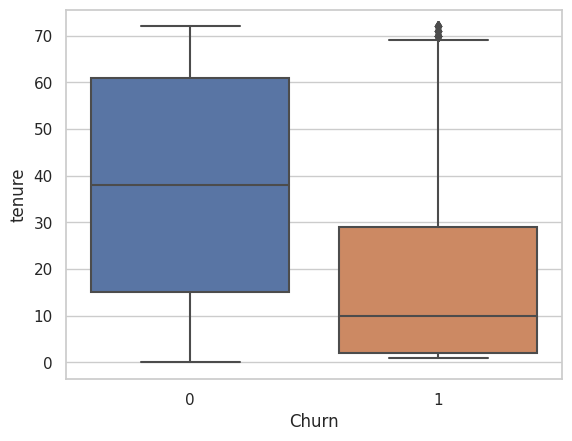

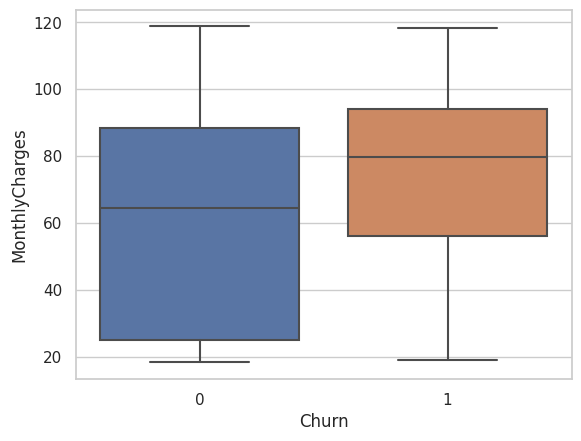

<Axes: xlabel='Churn', ylabel='TotalCharges'>

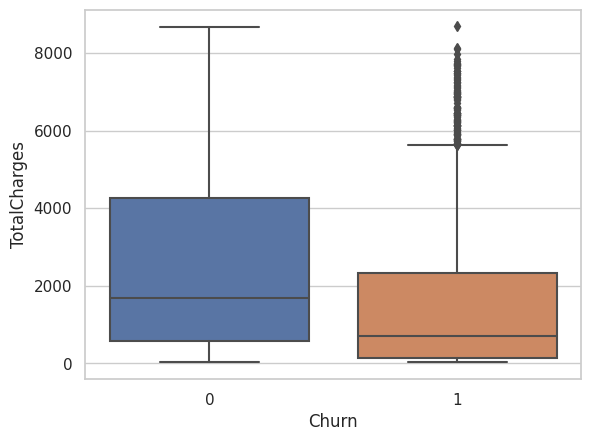

In [ ]:
#Exploring the relationships between the numerical variables and the churn variable
sns.boxplot(data=data,y='tenure',x='Churn')
plt.show()
sns.boxplot(data=data,y='MonthlyCharges',x='Churn')
plt.show()
sns.boxplot(data=data,y='TotalCharges',x='Churn')

In [ ]:
num_cols = ['tenure','MonthlyCharges','TotalCharges']

for feature in num_cols:
  group_df = data.groupby([feature, 'Churn']).size().reset_index()
  group_df = group_df.rename(columns={0: 'Count'})
  fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
  fig.show()

#Analysis of the results
Customer having higher churn rate are usually the one who are with subscriber for tenure less than 30 months. Tenure of customer who churned may be more than 30 months but we see it in few cases.
The tenure histogram is rightly skewed implying that most customers have been with the telecom company for just the first few months (0-9 months). The highest rate of churn is also in the first few months (0-9months). The monthly charge histogram shows that clients with higher monthly charges have a higher churn rate. The totalCharges histogram shows that very few people pay higher charges.Customers having churn rate have usually lower annual charges.


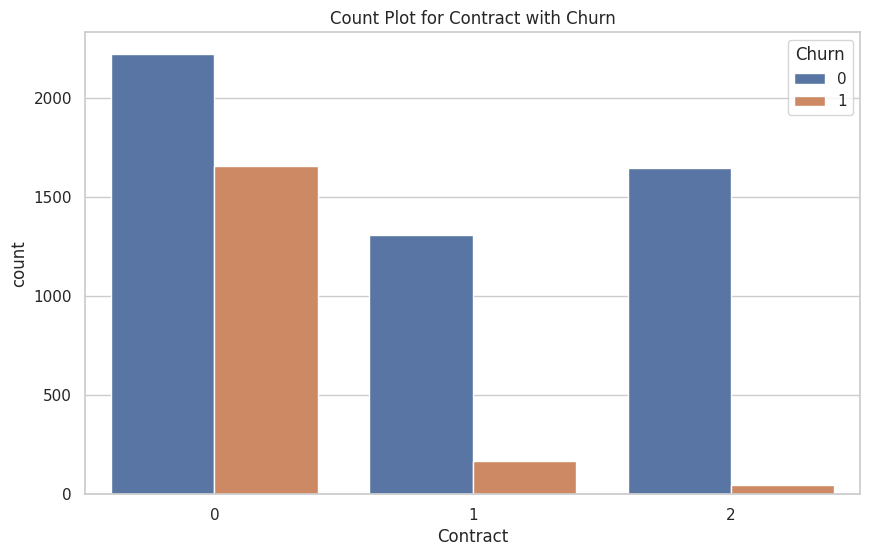

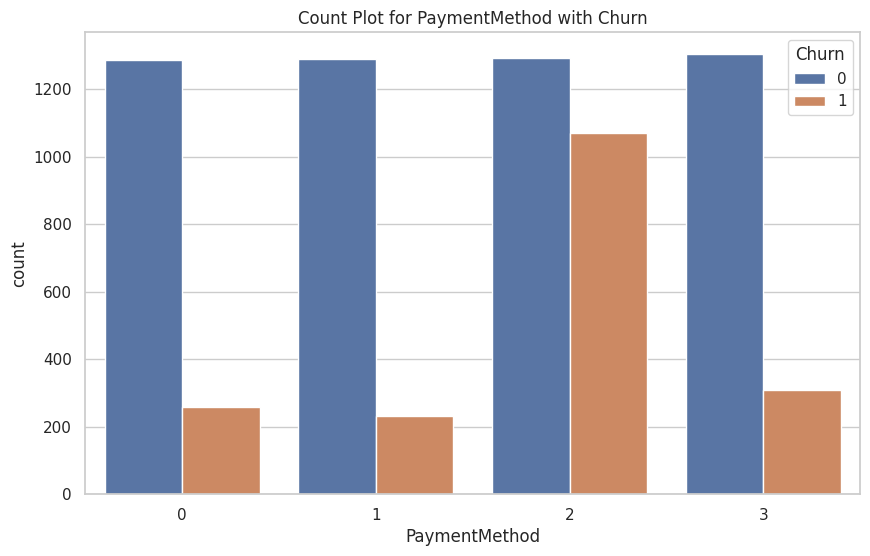

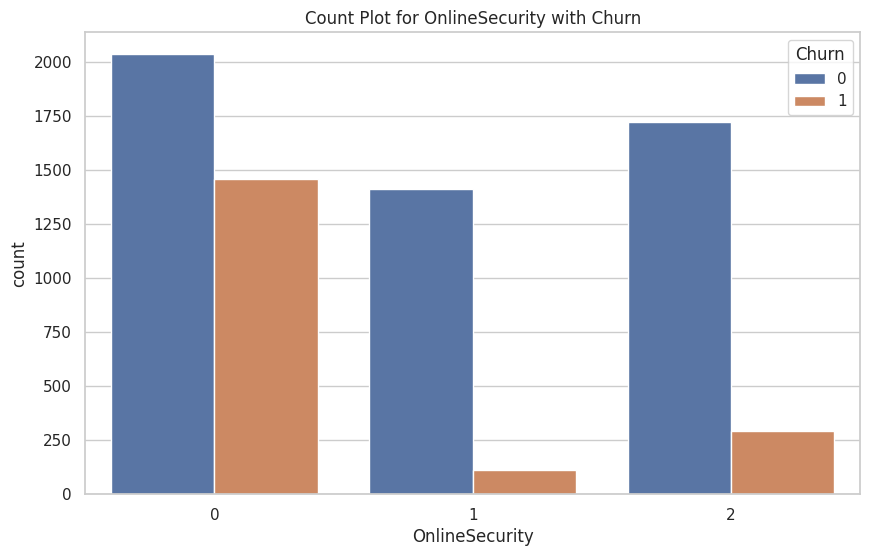

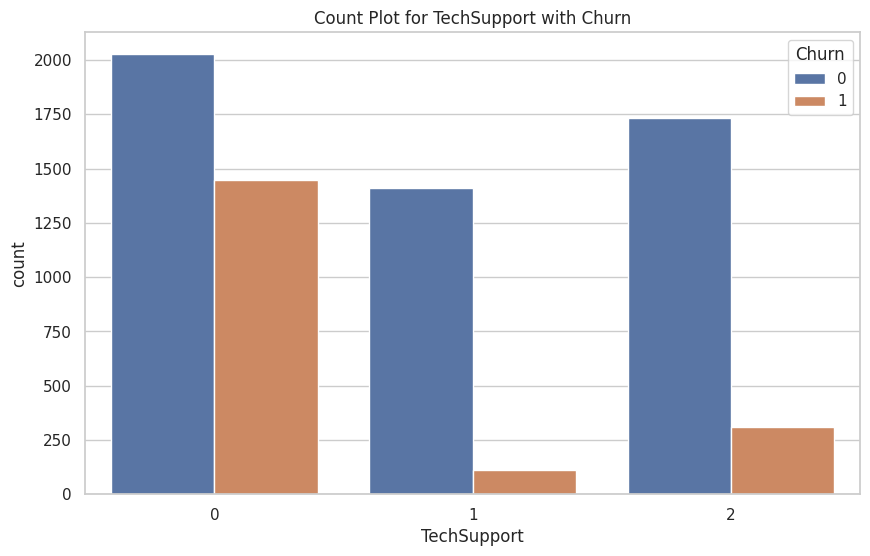

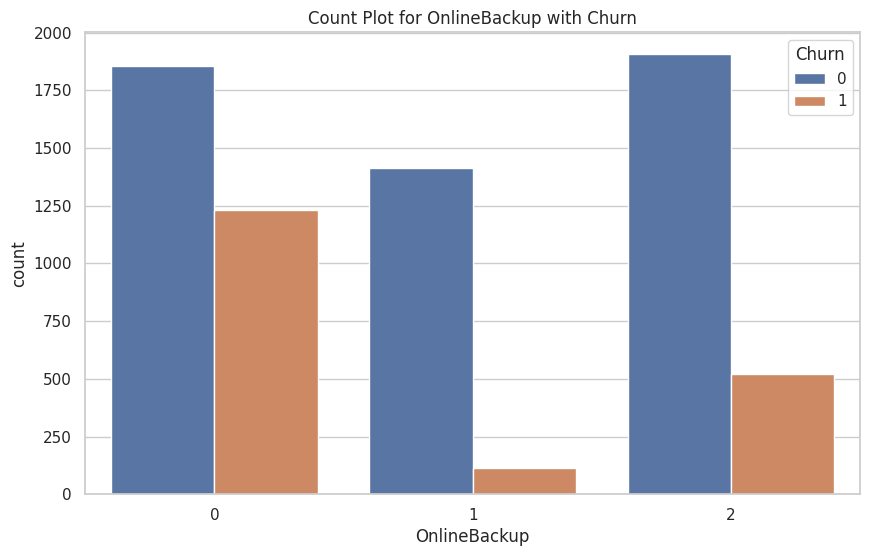

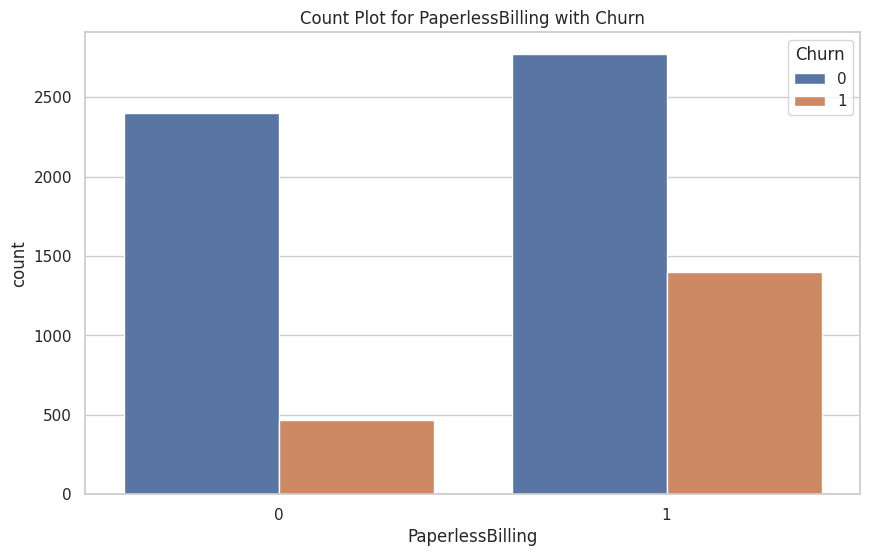

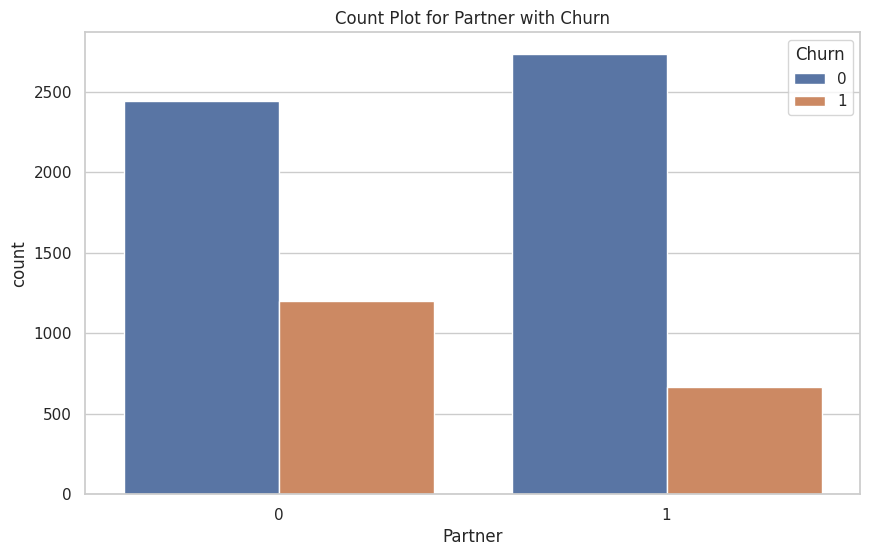

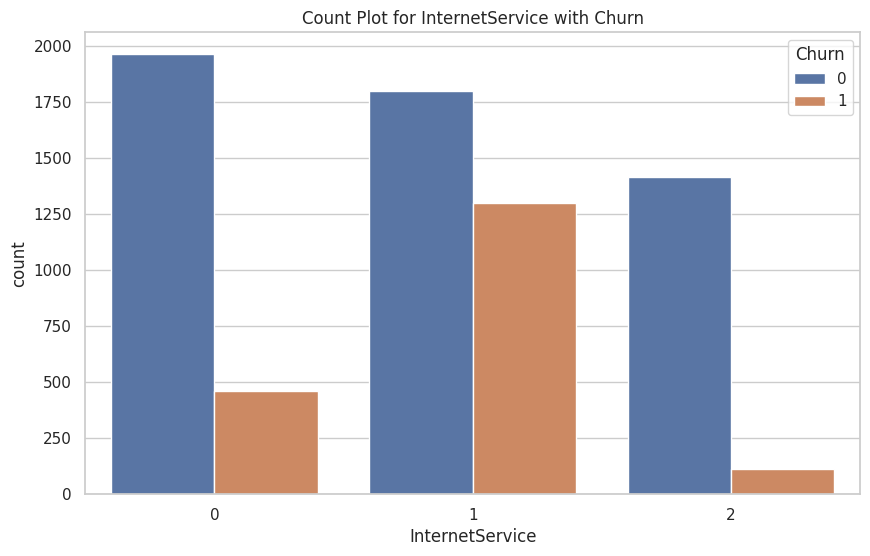

In [ ]:
#Understanding the relationship of the categorical variables with the churn target
#features = final_features.copy()
features_to_separate = ['TotalCharges','MonthlyCharges','tenure','Contract','PaymentMethod','OnlineSecurity','TechSupport',
                        'OnlineBackup','PaperlessBilling','Partner','InternetService']

#features_to_separate = final_features.columns
selected_features = second_data[features_to_separate]
selected_features = selected_features.drop('tenure', axis=1)
selected_features = selected_features.drop('MonthlyCharges', axis=1)
selected_features = selected_features.drop('TotalCharges', axis=1)

#features = features.drop('tenure', axis=1)
#features = features.drop('MonthlyCharges', axis=1)
#features = features.drop('TotalCharges', axis=1)
categorical_variables = selected_features.columns


for var in categorical_variables:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.countplot(data=data, x=var, hue='Churn')
    plt.title(f'Count Plot for {var} with Churn')
    plt.show()


#Analysis of the results
**1.Partner**-Having a partner does affect the churn rate. As we can see customer with and without partner have minor difference. Still the Churn rate of customer having Partner is low.
**2.OnlineSecurity-**People having No Online Security tends to have higher Churn rate.
**3.OnlineBackup**Customers with No online backup have highest churn rate.
**4.TechSupport**Customer having No Tech Support tends to have higher churn rate.
**5.Contract**Since, majority of customer have month-to-month subscription they tend to have churn rate higher than others as they can discontinue service after any month of getting service.
**6.PaperlessBilling**Customer having paperless bill have higher churn rate
**7.PaymentMethod**Customers having Electronic Check as their payment method have higher churn rate.
**8.InternetService**Internet Service has 3 types of values, where Fiber optic connection has the highest Churn rate.






#Profile of customer profiles that relate to churning a lot
**Customers with partners,no online security, no tech support,with month to month subscriptions,having paperless bill,using electronic payment method and using fiber optic internet service affect churning a lot.**

#3. Training an MLP using features from (1) with cross validation and GridSearchCV

Defining the model to be a non-functional API

In [ ]:
#Importing the necessary modules for this section
#!pip install tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.layers import Input,Dense
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
!pip install scikeras
from scikeras.wrappers import KerasClassifier
from tensorflow.keras import optimizers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers


In [ ]:
#Splitting the data into the train and test data
train_x,test_x,train_y,test_y=train_test_split(final_features,y,test_size=0.10,random_state=101)
x_train,val_x,y_train,val_y=train_test_split(train_x,train_y,test_size=0.10,random_state=101)

In [ ]:
from sklearn.utils import class_weight

#Calculating class weights
weights= class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

#Converting to dictionary format
weight_dict={0:weights[0],1:weights[1]}


#Defining the MLP model, functional API
input_layer=tf.keras.Input(shape=11,)
x1 = tf.keras.layers.Dense(128, activation='relu')(input_layer)
dropout1 = tf.keras.layers.Dropout(0.50)(x1)
x2 = tf.keras.layers.Dense(64, activation='relu')(dropout1)
dropout2 = tf.keras.layers.Dropout(0.60)(x2)
output = tf.keras.layers.Dense(1, activation='sigmoid')(dropout2)


model = tf.keras.Model(inputs=input_layer,outputs=output)

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(val_x, val_y), class_weight=weight_dict)

Epoch 1/100
179/179 [==============================] - 6s 11ms/step - loss: 44.4959 - accuracy: 0.5445 - val_loss: 1.2128 - val_accuracy: 0.3738
Epoch 2/100
179/179 [==============================] - 1s 5ms/step - loss: 4.7587 - accuracy: 0.5212 - val_loss: 0.6859 - val_accuracy: 0.5363
Epoch 3/100
179/179 [==============================] - 1s 5ms/step - loss: 1.5600 - accuracy: 0.4686 - val_loss: 0.6673 - val_accuracy: 0.6420
Epoch 4/100
179/179 [==============================] - 1s 5ms/step - loss: 1.0884 - accuracy: 0.4229 - val_loss: 0.6925 - val_accuracy: 0.4511
Epoch 5/100
179/179 [==============================] - 1s 6ms/step - loss: 0.9534 - accuracy: 0.4106 - val_loss: 0.6966 - val_accuracy: 0.4164
Epoch 6/100
179/179 [==============================] - 1s 6ms/step - loss: 0.7984 - accuracy: 0.3787 - val_loss: 0.7033 - val_accuracy: 0.2634
Epoch 7/100
179/179 [==============================] - 1s 5ms/step - loss: 0.7982 - accuracy: 0.3776 - val_loss: 0.6990 - val_accuracy: 0.26

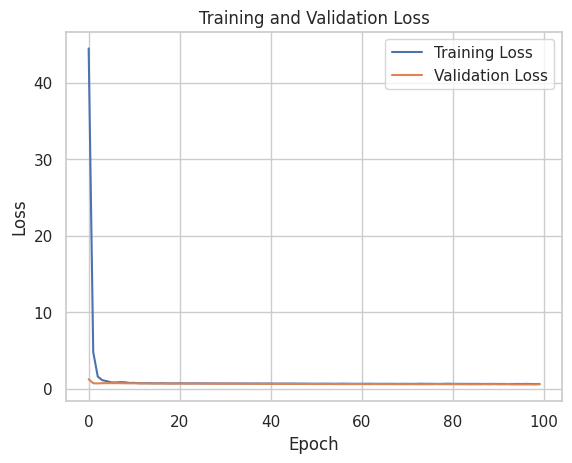

In [ ]:
# Plotting the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Evaluating the model using Accuracy and AUC score

In [ ]:
# Predictions on the test set
y_pred1 = model.predict(test_x)

# Extracting probabilities for the positive class
y_prob = y_pred1.flatten()

y_pred_prob = (y_pred1 >0.5).astype(int)


# Accuracy
accuracy1 = accuracy_score(test_y, y_pred_prob)
print("Accuracy:", accuracy1)


# AUC Score
auc_score1 = roc_auc_score(test_y, y_pred_prob)
print("AUC Score:", auc_score1)

23/23 [==============================] - 0s 2ms/step
Accuracy: 0.7645390070921986
AUC Score: 0.7118316831683168


#Optimizing the model with hyperparameter tuning using Grid Search and cross validation



In [ ]:
#Wrapping Keras model as a scikit-learn compatible classifier
keras_clf = KerasClassifier(build_fn=model,epochs=10,batch_size=32,verbose=0)

In [ ]:
#Use stratifiedkfold for cross validation
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'optimizer'  : ['rmsprop','sgd','adam'],
    'epochs'     : [50, 100],
    'batch_size' : [32,64,128]
}

# Creating a KFold object for cross-validationk
grid_search = GridSearchCV(keras_clf, param_grid, scoring='accuracy',n_jobs=-1, cv=skf)


In [ ]:
# Fit the model with hyperparameter tuning
grid_search.fit(train_x, train_y)


In [ ]:
# Access the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Hyperparameters: {'batch_size': 128, 'epochs': 50, 'optimizer': 'rmsprop'}
Best Accuracy: 0.7895250461235089


In [ ]:
print (f'With {grid_search.best_params_} got {round(grid_search.best_score_*100,2)} as best score!!')

With {'batch_size': 128, 'epochs': 50, 'optimizer': 'rmsprop'} got 78.95 as best score!!


#Training with the optimized model from the GridSearch

In [ ]:
# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_

In [ ]:
# Predictions on the test set
y_pred = best_model.predict(test_x)
y_pred_proba = best_model.predict_proba(test_x)[:, 1]

# Accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# AUC Score
auc_score = roc_auc_score(test_y, y_pred_proba)
print("AUC Score:",auc_score)

Accuracy: 0.7588652482269503
AUC Score: 0.8197178217821782


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix\n",confusion_matrix(y_pred,test_y))
print("Classification Report\n",classification_report(y_pred,test_y))

Confusion Matrix
 [[487 152]
 [ 18  48]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.76      0.85       639
           1       0.24      0.73      0.36        66

    accuracy                           0.76       705
   macro avg       0.60      0.74      0.61       705
weighted avg       0.90      0.76      0.81       705



#Deploying the model

In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
#Saving the trained model
filename="CustomerChurning.joblib"
joblib.dump(best_model,filename)


['CustomerChurning.joblib']

In [ ]:
#Saving the StandardScaler
scaler_filename="scaler.joblib"
joblib.dump(scaler,scaler_filename)

['scaler.joblib']